In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor  # LightGBM model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import joblib
import os
import pickle
from datetime import datetime

In [100]:
df_train = pd.read_csv('train.csv')
df_store = pd.read_csv('store.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11412\3622840614.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train.csv')


In [101]:
# Merge the DataFrames on the 'Store' column
df= pd.merge(df_train, df_store, on='Store', how='inner')

# Display the merged DataFrame
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [103]:
df['StateHoliday'] = df['StateHoliday'].astype(str)

In [104]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoders for each categorical column
le_state_holiday = LabelEncoder()
le_assortment = LabelEncoder()
le_store_type = LabelEncoder()
le_promo_interval = LabelEncoder()

# Fit and transform the columns
df['StateHoliday'] = le_state_holiday.fit_transform(df['StateHoliday'])
df['Assortment'] = le_assortment.fit_transform(df['Assortment'])
df['StoreType'] = le_store_type.fit_transform(df['StoreType'])
df['PromoInterval'] = le_promo_interval.fit_transform(df['PromoInterval'])

# Display the first few rows of the updated DataFrame
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3
1,1,4,2015-07-30,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3
2,1,3,2015-07-29,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3
3,1,2,2015-07-28,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3
4,1,1,2015-07-27,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3


In [105]:
df['Date'] = pd.to_datetime(df['Date'])

In [106]:
##adding features:

# Weekday (0 = Monday, 6 = Sunday)
df['Weekday'] = df['Date'].dt.weekday

# Weekend indicator
df['IsWeekend'] = df['Weekday'].isin([5, 6]).astype(int)  # 5 = Saturday, 6 = Sunday

# Holiday indicators
df['IsStateHoliday'] = df['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

df['IsSchoolHoliday'] = df['SchoolHoliday'].astype(int)  # Convert to int directly

# Combine holiday indicators
df['IsHoliday'] = df['IsStateHoliday'] | df['IsSchoolHoliday']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int32         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int32         
 10  Assortment                 1017209 non-null  int32         
 11  CompetitionDistance        1014567 no

Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
IsSchoolHoliday              0.085124
SchoolHoliday                0.085124
PromoInterval                0.079829
Assortment                   0.074941
Promo2SinceWeek              0.059558
Date                         0.041904
CompetitionOpenSinceYear     0.012659
Store                        0.005126
StoreType                   -0.013057
CompetitionDistance         -0.019229
Promo2SinceYear             -0.021127
CompetitionOpenSinceMonth   -0.028257
Promo2                      -0.091040
StateHoliday                -0.229029
IsWeekend                   -0.450152
DayOfWeek                   -0.462125
Weekday                     -0.462125
IsStateHoliday                    NaN
IsHoliday                         NaN
Name: Sales, dtype: float64


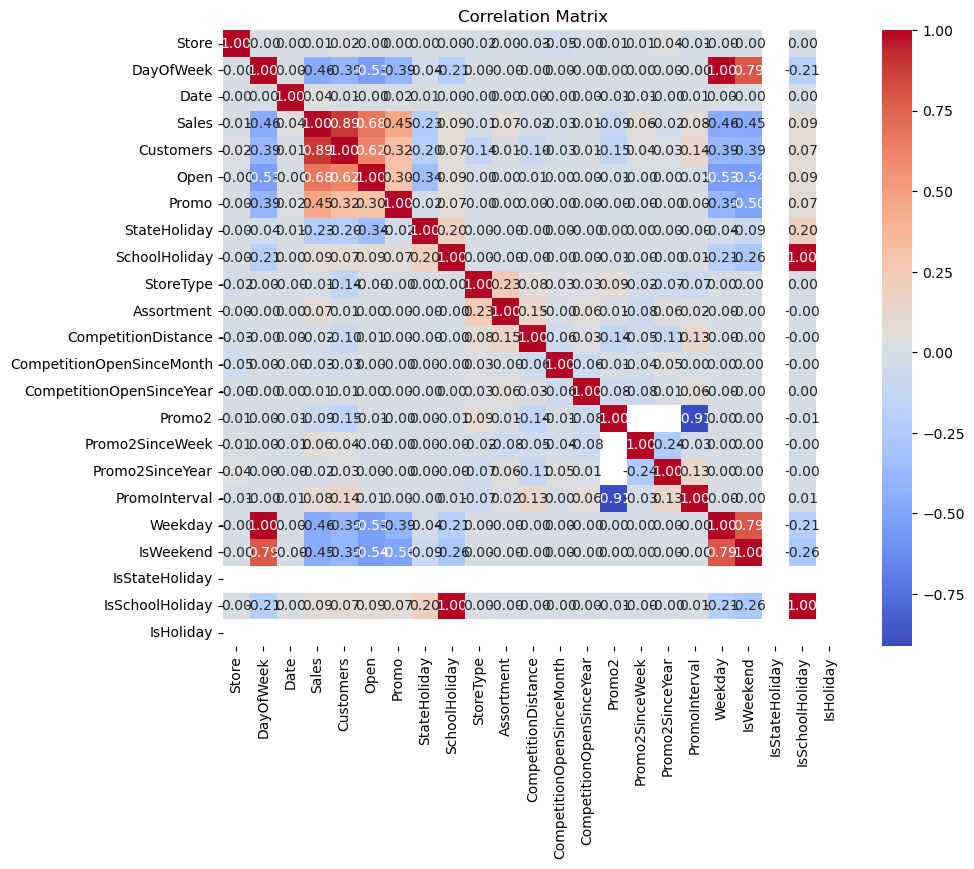

In [84]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlations with the 'Sales' column and sort by absolute correlation value
sales_correlations = correlation_matrix['Sales'].sort_values(ascending=False)

# Display correlations with 'Sales' in a single column
print(sales_correlations)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [108]:
# renaming the column promo as ispromo
df.rename(columns={'Promo': 'IsPromo'}, inplace=True)

In [129]:
# Assuming df is your DataFrame with a 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Check if the new columns were added
print("DataFrame columns after adding year, month, and day:", df.columns)


DataFrame columns after adding year, month, and day: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'IsPromo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Weekday', 'IsWeekend',
       'IsStateHoliday', 'IsSchoolHoliday', 'IsHoliday', 'Year', 'Month',
       'Day'],
      dtype='object')


In [118]:
selected_features_webinterface = [
    'Store',
    'Date',
    'Open', 
    'IsPromo', 
    'IsHoliday', 
    'Assortment', 
    'StoreType',                 
    'IsWeekend', 
    'DayOfWeek', 
    'Weekday'
]


In [119]:
df_wi = df[selected_features_webinterface]


In [120]:
df_wi.to_csv("selected_columns_wi.csv", index=False)

In [117]:
selected_features = [
    'Open', 
    'IsPromo', 
    'IsHoliday', 
    'Assortment', 
    'StoreType',                 
    'IsWeekend', 
    'DayOfWeek', 
    'Weekday'
]


In [25]:


# Define features and targets
X = df[selected_features]
y_sales = df['Sales']
y_customers = df['Customers']  # Keep this for later use

# Train your model for Sales prediction
model_sales = RandomForestRegressor()
model_sales.fit(X, y_sales)

# Predict Sales
sales_predictions = model_sales.predict(X)

# Optionally, train another model for Customers if needed
model_customers = RandomForestRegressor()
model_customers.fit(X, y_customers)
customers_predictions = model_customers.predict(X)

# Now you can plot both sales_predictions and customers_predictions together on the dashboard


In [27]:
# Calculate metrics for Sales
rmse_sales = np.sqrt(mean_squared_error(y_sales, sales_predictions))
mae_sales = mean_absolute_error(y_sales, sales_predictions)
r2_sales = r2_score(y_sales, sales_predictions)

print("Sales Model Metrics:")
print(f"RMSE: {rmse_sales:.2f}")
print(f"MAE: {mae_sales:.2f}")
print(f"R² Score: {r2_sales:.2f}")

# Calculate metrics for Customers
rmse_customers = np.sqrt(mean_squared_error(y_customers, customers_predictions))
mae_customers = mean_absolute_error(y_customers, customers_predictions)
r2_customers = r2_score(y_customers, customers_predictions)

print("\nCustomers Model Metrics:")
print(f"RMSE: {rmse_customers:.2f}")
print(f"MAE: {mae_customers:.2f}")
print(f"R² Score: {r2_customers:.2f}")

Sales Model Metrics:
RMSE: 2476.10
MAE: 1631.46
R² Score: 0.59

Customers Model Metrics:
RMSE: 303.58
MAE: 189.46
R² Score: 0.57


In [86]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

Q1_customers = df['Customers'].quantile(0.25)
Q3_customers = df['Customers'].quantile(0.75)
IQR_customers = Q3_customers - Q1_customers

# Define upper and lower bounds for outliers
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

lower_bound_customers = Q1_customers - 1.5 * IQR_customers
upper_bound_customers = Q3_customers + 1.5 * IQR_customers

# Filter the DataFrame to remove outliers
df_filtered = df[
    (df['Sales'] >= lower_bound_sales) & (df['Sales'] <= upper_bound_sales) &
    (df['Customers'] >= lower_bound_customers) & (df['Customers'] <= upper_bound_customers)
]

# Output the shape of the new DataFrame
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)


Original DataFrame shape: (1017209, 23)
Filtered DataFrame shape: (971403, 23)


In [92]:

# Define features and targets
X = df_filtered[selected_features]
y_sales = df_filtered['Sales']
y_customers = df_filtered['Customers']  # Keep this for later use

# Train your model for Sales prediction
model_sales_rfr = RandomForestRegressor()
model_sales_rfr.fit(X, y_sales)

# Predict Sales
sales_predictions = model_sales_rfr.predict(X)

# train another model for Customers if needed
model_customers_rfr = RandomForestRegressor()
model_customers_rfr.fit(X, y_customers)
customers_predictions = model_customers.predict(X)

# Now you can plot both sales_predictions and customers_predictions together on the dashboard


In [93]:
# Calculate metrics for Sales
rmse_sales = np.sqrt(mean_squared_error(y_sales, sales_predictions))
mae_sales = mean_absolute_error(y_sales, sales_predictions)
r2_sales = r2_score(y_sales, sales_predictions)

print("Sales Model Metrics:")
print(f"RMSE: {rmse_sales:.2f}")
print(f"MAE: {mae_sales:.2f}")
print(f"R² Score: {r2_sales:.2f}")

# Calculate metrics for Customers
rmse_customers = np.sqrt(mean_squared_error(y_customers, customers_predictions))
mae_customers = mean_absolute_error(y_customers, customers_predictions)
r2_customers = r2_score(y_customers, customers_predictions)

print("\nCustomers Model Metrics:")
print(f"RMSE: {rmse_customers:.2f}")
print(f"MAE: {mae_customers:.2f}")
print(f"R² Score: {r2_customers:.2f}")

Sales Model Metrics:
RMSE: 1857.27
MAE: 1332.82
R² Score: 0.68

Customers Model Metrics:
RMSE: 206.04
MAE: 147.60
R² Score: 0.66


In [95]:
# Save the sales prediction model
joblib.dump(model_sales_rfr, 'model_sales_rfr.joblib')

['model_sales_rfr.joblib']

In [96]:
# Load the sales prediction model
model_sales_rfr = joblib.load('model_sales_rfr.joblib')

In [97]:
joblib.dump(model_customers_rfr, 'model_customers_rfr.joblib')


['model_customers_rfr.joblib']

In [98]:
model_customers_rfr = joblib.load('model_customers_rfr.joblib')


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   IsPromo                    1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int32         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int32         
 10  Assortment                 1017209 non-null  int32         
 11  CompetitionDistance        1014567 no

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming df is your DataFrame with date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)
df['IsHoliday'] = df['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Normalize features
features = ['Sales', 'Customers', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'IsHoliday']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Function to create sequences
def create_sequences(data, target, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

# Prepare data for LSTM
time_steps = 10  # Adjust based on your needs
X, y = create_sequences(df[features].values, df['Sales'].values, time_steps)

# Check shape of X
print("Shape of X:", X.shape)  # Should be (samples, time_steps, features)

from tensorflow.keras.layers import Input

# Build LSTM model with Input layer
model = Sequential()
model.add(Input(shape=(X.shape[1], X.shape[2])))  # Using Input layer
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for sales prediction

model.compile(optimizer='adam', loss='mean_squared_error')


Shape of X: (1017199, 10, 8)


In [40]:
# Train the model (X_train and y_train are your training data)
model.fit(X, y, epochs=10, batch_size=32)  # Adjust epochs and batch size as needed


Epoch 1/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 441s 14ms/step - loss: 6.1749e-04
Epoch 2/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 435s 14ms/step - loss: 6.0453e-04
Epoch 3/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 441s 14ms/step - loss: 5.8443e-04
Epoch 4/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 444s 14ms/step - loss: 5.7093e-04
Epoch 5/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 447s 14ms/step - loss: 5.5471e-04
Epoch 6/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 443s 14ms/step - loss: 5.3782e-04
Epoch 7/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 505s 14ms/step - loss: 5.2839e-04
Epoch 8/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 438s 14ms/step - loss: 5.2671e-04
Epoch 9/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 442s 14ms/step - loss: 5.2060e-04
Epoch 10/10
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 484s 15ms/step - loss: 5.1311e-04


In [126]:
print("DataFrame columns:", df.columns)
print("Features being used:", features)


DataFrame columns: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'IsPromo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Weekday', 'IsWeekend',
       'IsStateHoliday', 'IsSchoolHoliday', 'IsHoliday'],
      dtype='object')
Features being used: 8


In [127]:
# Define features as a list of relevant column names
features = ['Sales', 'Customers', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'IsHoliday']


In [44]:
# Save the model
model.save('lstm_sales_model.h5')  # Change the filename as needed


In [89]:
# Define features and targets
X = df_filtered[selected_features]
y_sales = df_filtered['Sales']

In [138]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming df is your DataFrame with 'Date' and other features

# Normalize the 'Sales' column only, other features remain as they are
features = ['Sales', 'Customers', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'IsHoliday']
scaler = MinMaxScaler()

# Scale only the 'Sales' column, other features are not scaled
df['Sales'] = scaler.fit_transform(df[['Sales']])

# Function to create sequences for LSTM
def create_sequences(data, target, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

# Prepare data for LSTM model
time_steps = 10  # Look-back period
X, y = create_sequences(df[features].values, df['Sales'].values, time_steps)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predict 'Sales' value

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=2, batch_size=32)

# Make predictions for the last time steps (to test the model)
last_time_steps = df[features].values[-time_steps:]
last_time_steps = last_time_steps.reshape((1, time_steps, len(features)))

# Make predictions
predictions = model.predict(last_time_steps)

# Inverse transform the predictions back to original 'Sales' values
predictions_original = scaler.inverse_transform(predictions.reshape(-1, 1))

# Print the predicted sales
print("Predicted sales in original scale:", predictions_original)


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 535s 17ms/step - loss: 0.0032
Epoch 2/2
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 597s 19ms/step - loss: 0.0012


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
Predicted sales in original scale: [[0.19941923]]


In [137]:
# Ensure that predictions is in the correct shape (1, 1) for inverse transformation
predictions = predictions.reshape(-1, 1)  # Reshape to (1, 1)

# Create an array that includes the prediction and zeros for the other features
# We add zeros to match the shape of all features (including the ones not predicted)
predictions_with_zeros = np.concatenate((predictions, np.zeros((predictions.shape[0], len(features) - 1))), axis=1)

# Perform the inverse transformation to get the actual sales value (including all features)
inverse_transformed = scaler.inverse_transform(predictions_with_zeros)

# Extract only the 'Sales' column (first column)
predicted_sales_original = inverse_transformed[:, 0]

print("Predicted sales in original scale:", predicted_sales_original)


Predicted sales in original scale: [0.23177925]


In [ ]:
# Load your training data
data = pd.read_csv('selected_columns_wi.csv')

# Select features that are relevant for scaling
# Replace 'features_columns' with your actual feature column names
features = data[['Open', 'IsPromo', 'IsHoliday', 'Assortment', 'StoreType', 'IsWeekend', 'DayOfWeek']]  # Example features

# Initialize and fit the scaler
scaler = MinMaxScaler()
scaler.fit(features)

# Save the scaler to a file
with open('lstm_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved as 'lstm_scaler.pkl'")


Scaler saved as 'lstm_scaler.pkl'


In [150]:
import pandas as pd
import numpy as np
import joblib

# Load your models (ensure these models are in your working directory)
model_sales = joblib.load('model_sales_rfr.joblib')
model_customers = joblib.load('model_customers_rfr.joblib')

def create_future_input_data_for_all_stores(last_date, future_days=180):
    all_future_data = []  # List to store data for all stores
    
    for store_id in range(1, 1116):  # Loop through store IDs 1 to 1115
        # Generate future dates
        future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

        # Create a DataFrame for future predictions
        future_data = pd.DataFrame({
            'Date': future_dates,
            'Store': store_id,
            'Open': [1] * future_days,  # Assuming the store is open every day
            'IsPromo': [0] * future_days,  # You may want to apply some logic here
            'IsHoliday': [0] * future_days,  # Apply logic based on your holiday calendar
            'Assortment': [1] * future_days,  # Assume a constant value or predict based on trends
            'StoreType': [0] * future_days,  # Assume a constant value
            'IsWeekend': [1 if date.weekday() >= 5 else 0 for date in future_dates],  # 1 for Sat/Sun
            'DayOfWeek': [date.dayofweek for date in future_dates],  # 0=Monday, 6=Sunday
            'Weekday': [1 if date.weekday() < 5 else 0 for date in future_dates]  # 1 for Mon-Fri
        })

        # Predicting sales and customer counts
        predicted_sales = model_sales.predict(future_data[['Open', 'IsPromo', 'IsHoliday', 'Assortment', 'StoreType', 'IsWeekend', 'DayOfWeek', 'Weekday']])
        predicted_customers = model_customers.predict(future_data[['Open', 'IsPromo', 'IsHoliday', 'Assortment', 'StoreType', 'IsWeekend', 'DayOfWeek', 'Weekday']])
        
        future_data['Predicted_Sales'] = predicted_sales
        future_data['Predicted_Customers'] = predicted_customers
        
        all_future_data.append(future_data)  # Append the future data for this store

    # Concatenate all future data into a single DataFrame
    all_future_data_df = pd.concat(all_future_data, ignore_index=True)

    # Save the future input data with predictions to a CSV file
    all_future_data_df.to_csv('future_predictions_all_stores.csv', index=False)

    return all_future_data_df

# Example usage:
last_date = pd.to_datetime("2015-07-31")  # Replace with your last historical date
future_input_data = create_future_input_data_for_all_stores(last_date)
print(future_input_data)


             Date  Store  Open  IsPromo  IsHoliday  Assortment  StoreType  \
0      2015-08-01      1     1        0          0           1          0   
1      2015-08-02      1     1        0          0           1          0   
2      2015-08-03      1     1        0          0           1          0   
3      2015-08-04      1     1        0          0           1          0   
4      2015-08-05      1     1        0          0           1          0   
...           ...    ...   ...      ...        ...         ...        ...   
200695 2016-01-23   1115     1        0          0           1          0   
200696 2016-01-24   1115     1        0          0           1          0   
200697 2016-01-25   1115     1        0          0           1          0   
200698 2016-01-26   1115     1        0          0           1          0   
200699 2016-01-27   1115     1        0          0           1          0   

        IsWeekend  DayOfWeek  Weekday  Predicted_Sales  Predicted_Customers